In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

Sunglass Dimensions (136, 314, 4)


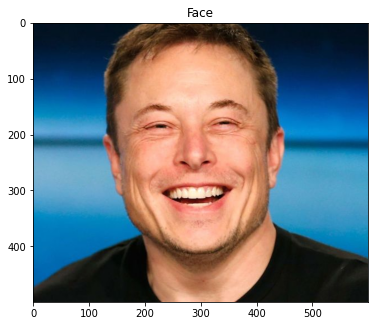

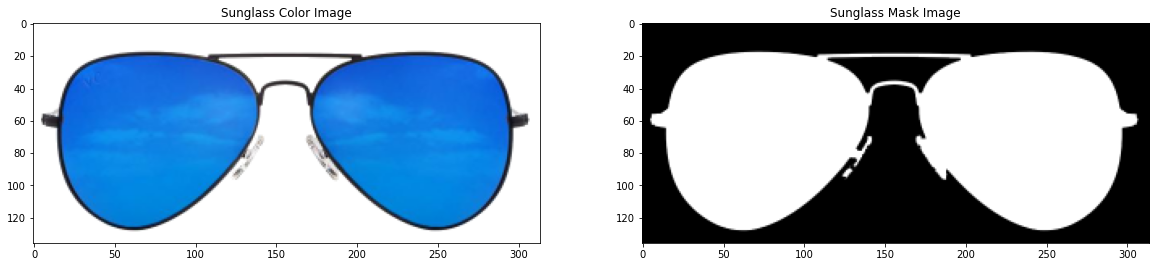

In [22]:
image = cv2.imread(DATA_PATH+"images/musk.jpg",cv2.IMREAD_COLOR)
faceImage = np.float32(image)/255

plt.imshow(faceImage[...,::-1]);plt.title("Face")

faceW,faceH = faceImage.shape[:2]

sunglass = cv2.imread(DATA_PATH+"images/sunglass.png",cv2.IMREAD_UNCHANGED)
glassPNG = np.float32(sunglass)/255

glassPNG = cv2.resize(glassPNG,None,fx=0.5,fy=0.5)
glassH,glassW,mChannels = glassPNG.shape
print("Sunglass Dimensions {}".format(glassPNG.shape))

glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

plt.figure(figsize=[20,20])

plt.subplot(121);plt.imshow(glassBGR[...,::-1]);plt.title("Sunglass Color Image")
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title("Sunglass Mask Image");

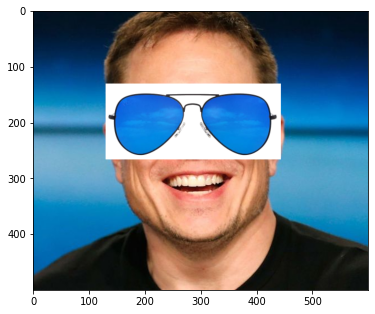

In [23]:
# Top left corner of the glasses
topLeftRow = 130
topLeftCol = 130

bottomRightRow = topLeftRow + glassH
bottomRightCol = topLeftCol + glassW

# Make a copy
faceWithGlassesNaive = faceImage.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

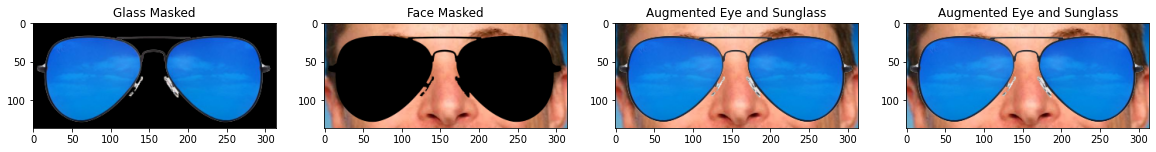

In [36]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

faceWithGlassesArithmetic = faceImage.copy()

eyeRoi= faceWithGlassesArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]

maskedGlass = cv2.multiply(glassBGR,glassMask)
maskedEye = cv2.multiply(eyeRoi,(1 - glassMask))
eyeRoiFinal = cv2.add(maskedEye,maskedGlass)

plt.figure(figsize=[20,20])
plt.subplot(141);plt.imshow(maskedGlass[:,:,::-1]);plt.title("Glass Masked")
plt.subplot(142);plt.imshow(maskedEye[:,:,::-1]);plt.title("Face Masked")
plt.subplot(143);plt.imshow(eyeRoiFinal[:,:,::-1]);plt.title("Augmented Eye and Sunglass")

maskedEyeB = cv2.addWeighted(maskedEye, 0, glassMask, 0.5, 0.0)
maskedEye = cv2.multiply(eyeRoi, (1 - maskedEyeB ))

eyeRoiFinal1 = cv2.add(maskedEye,maskedGlass)
plt.subplot(144);plt.imshow(eyeRoiFinal[:,:,::-1]);plt.title("Augmented Eye and Sunglass")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'With Sunglass Eye Visibility')

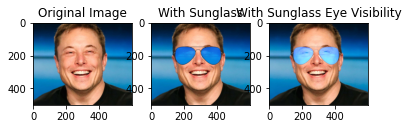

In [37]:
faceWithGlassesArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol] = eyeRoiFinal

plt.subplot(131);plt.imshow(faceImage[:,:,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglass")

faceWithGlassesArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol] = eyeRoiFinal1
plt.subplot(133);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglass Eye Visibility")

